In [1]:
import pandas as pd
import numpy as np
import bs4 as bs
import requests
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import seaborn as sns

In [2]:
CLIENT_ID = 'UOSOUPHZSZ31RZYIACFNWILJ4U1E4HJPT51BGJEXQUKCUJSW' # your Foursquare ID
CLIENT_SECRET = 'ZRXAYW4AVLVJAOAOQP3QS2M1CLFUF5SGCLB5GUQYAM10R2MG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 200 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UOSOUPHZSZ31RZYIACFNWILJ4U1E4HJPT51BGJEXQUKCUJSW
CLIENT_SECRET:ZRXAYW4AVLVJAOAOQP3QS2M1CLFUF5SGCLB5GUQYAM10R2MG


In [57]:
df = pd.read_csv('BH_df.csv')
BH_venues = pd.read_csv('BH_venues.csv')
similar_hood = pd.read_csv('PetStore.csv',index_col=0)

In [58]:
working_df=similar_hood[['likes','Neighborhood','Venue']].groupby('Neighborhood').agg({'likes':'sum','Venue':'count'})
working_df.reset_index(inplace=True)

In [59]:
working_df = working_df.merge(df[df['Neighborhood'].isin(working_df['Neighborhood'])][['Neighborhood','Population','latitude','longitude','Size(km²)']],how='left',on='Neighborhood')

In [60]:
working_df['Population'] = working_df['Population'].str.replace('\xa0','').astype(int)

In [61]:
working_df['People/Venue'] = working_df['Population']/working_df['Venue']
working_df['likes/person'] = working_df['likes']/working_df['Population']

<AxesSubplot:xlabel='People/Venue', ylabel='likes'>

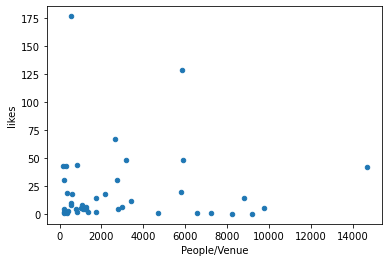

In [62]:
working_df[['Neighborhood','People/Venue','likes']].plot.scatter(y='likes',x='People/Venue')

In [63]:
best_hood = working_df[working_df['likes/person']>=0.001430].sort_values(by='People/Venue',ascending=False)
best_hood

,Neighborhood,likes,Venue,Population,latitude,longitude,Size(km²),People/Venue,likes/person
28,Savassi,48.0,2,11772,-19.937246,-43.935582,"1,186\n",5886.000000,0.004077
16,Gutierrez,129.0,3,17507,-19.934260,-43.957157,"1,246\n",5835.666667,0.007368
9,Coração de Jesus,20.0,1,5812,-19.945874,-43.951229,"0,284\n",5812.000000,0.003441
17,Horto,12.0,1,3429,-19.910141,-43.917867,"0,384\n",3429.000000,0.003500
30,São Pedro,48.0,2,6328,-19.943598,-43.937020,"0,583\n",3164.000000,0.007585
29,São Lucas,6.0,1,2987,-19.931156,-43.921262,"0,29\n",2987.000000,0.002009
7,Campo Alegre,4.0,1,2776,-19.831924,-43.947484,"0,217\n",2776.000000,0.001441
22,Nova Granada (ZS),30.0,2,5516,-19.941317,-43.969090,"0,578\n",2758.000000,0.005439
33,Vila Barragem Santa Lúcia,67.0,3,7999,-19.954831,-43.943795,"0,272\n",2666.333333,0.008376
23,Palmares (ZL),18.0,2,4364,-19.872856,-43.930000,"0,551\n",2182.000000,0.004125


In [78]:
# create map of Belo Horizonte using latitude and longitude values
address = 'Belo Horizonte, MG'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_BH = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, venue in zip(similar_hood['Venue Latitude'], similar_hood['Venue Longitude'], similar_hood['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label).add_to(map_BH)
    
for lat, lng, venue, size in zip(best_hood['latitude'], best_hood['longitude'], best_hood['Neighborhood'],best_hood['Size(km²)'].astype(int)):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=size/10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BH) 
    
map_BH

In [30]:
df['Size(km²)'] = df['Size(km²)'].str.replace('\n','')

In [50]:
df['Size(km²)']= df['Size(km²)'].str.replace(',','')

In [74]:
best_hood['Size(km²)'] = best_hood['Size(km²)'].str.replace('\n','')
best_hood['Size(km²)'] = best_hood['Size(km²)'].str.replace(',','')

In [73]:
best_hood

,Neighborhood,likes,Venue,Population,latitude,longitude,Size(km²),People/Venue,likes/person
28,Savassi,48.0,2,11772,-19.937246,-43.935582,"1,186\n",5886.000000,0.004077
16,Gutierrez,129.0,3,17507,-19.934260,-43.957157,"1,246\n",5835.666667,0.007368
9,Coração de Jesus,20.0,1,5812,-19.945874,-43.951229,"0,284\n",5812.000000,0.003441
17,Horto,12.0,1,3429,-19.910141,-43.917867,"0,384\n",3429.000000,0.003500
30,São Pedro,48.0,2,6328,-19.943598,-43.937020,"0,583\n",3164.000000,0.007585
29,São Lucas,6.0,1,2987,-19.931156,-43.921262,"0,29\n",2987.000000,0.002009
7,Campo Alegre,4.0,1,2776,-19.831924,-43.947484,"0,217\n",2776.000000,0.001441
22,Nova Granada (ZS),30.0,2,5516,-19.941317,-43.969090,"0,578\n",2758.000000,0.005439
33,Vila Barragem Santa Lúcia,67.0,3,7999,-19.954831,-43.943795,"0,272\n",2666.333333,0.008376
23,Palmares (ZL),18.0,2,4364,-19.872856,-43.930000,"0,551\n",2182.000000,0.004125
